<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/Prediksi%20harga%20pangan%20dengan%20algoritma%20linear%20regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [36]:
# Dataset diambil dari BPS dengan subjek inflasi dari tahun 1979-2018
# https://www.bps.go.id/subject/3/inflasi.html#subjekViewTab5

# Mengimpor dataset dari file CSV
dataset = pd.read_csv('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/data_bps.csv', delimiter=';')

In [37]:
# Memisahkan fitur dan target
X = dataset.iloc[:, 0].values.reshape(-1, 1)
y = dataset.iloc[:, 1].values

In [38]:
# Konversi array numpy ke DataFrame
df = pd.DataFrame({'Tahun': X.flatten(), 'Kenaikan Harga Pangan': y})

# Menampilkan data dalam satu tabel
print(df)

    Tahun  Kenaikan Harga Pangan
0    1980                  15.97
1    1981                   7.09
2    1982                   9.69
3    1983                  11.46
4    1984                   8.76
5    1985                   4.31
6    1986                   8.83
7    1987                   8.90
8    1988                   5.47
9    1989                   5.97
10   1990                   9.53
11   1991                   9.52
12   1992                   4.94
13   1993                   9.77
14   1994                   9.24
15   1995                   8.64
16   1996                   6.47
17   1997                  11.05
18   1998                  77.63
19   1999                   2.01
20   2000                   9.35
21   2001                  12.55
22   2002                  10.03
23   2003                   5.06
24   2004                   6.40
25   2005                  17.11
26   2006                   6.60
27   2007                   6.59
28   2008                  11.06
29   2009 

In [39]:
# Membagi dataset menjadi data latih dan data uji

split_ratio = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split_ratio, random_state=42)

In [40]:
# Membuat objek model regresi linier
regressor = LinearRegression()

# Melatih model dengan data latih
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
# Memprediksi kenaikan harga pangan menggunakan data uji
y_pred = regressor.predict(X_test)

# Evaluasi performa model menggunakan metrik Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 21.00374667865266


In [42]:
for x, y in zip(X_test, y_pred):
    print("X_test:", x, "y_pred:", y)


X_test: [1999] y_pred: 10.165482484769427
X_test: [1996] y_pred: 10.637127393385583
X_test: [1995] y_pred: 10.79434236292434
X_test: [2006] y_pred: 9.064977697998302
X_test: [1984] y_pred: 12.523707027850321
X_test: [1992] y_pred: 11.265987271540496
X_test: [2017] y_pred: 7.3356130330722635
X_test: [2007] y_pred: 8.907762728459545


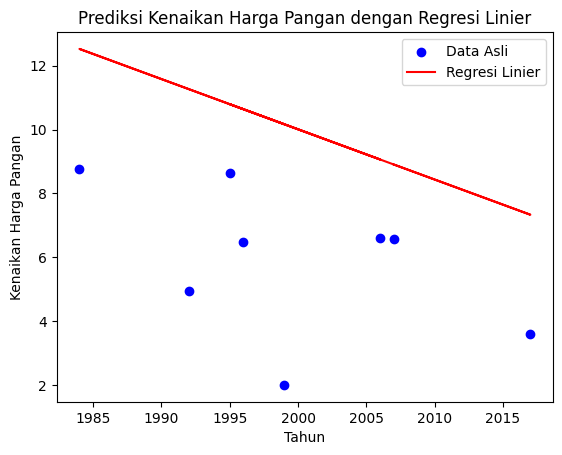

In [43]:
# Visualisasi hasil prediksi
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', label='Regresi Linier')
plt.xlabel('Tahun')
plt.ylabel('Kenaikan Harga Pangan')
plt.title('Prediksi Kenaikan Harga Pangan dengan Regresi Linier')
plt.legend()
plt.show()


Prediksi kenaikan harga pangan untuk tahun selanjutnya:
Tahun: 2023 Prediksi: 6.392323215839895
Tahun: 2024 Prediksi: 6.235108246301138
Tahun: 2025 Prediksi: 6.077893276762438
Tahun: 2026 Prediksi: 5.920678307223682
Tahun: 2027 Prediksi: 5.763463337684982


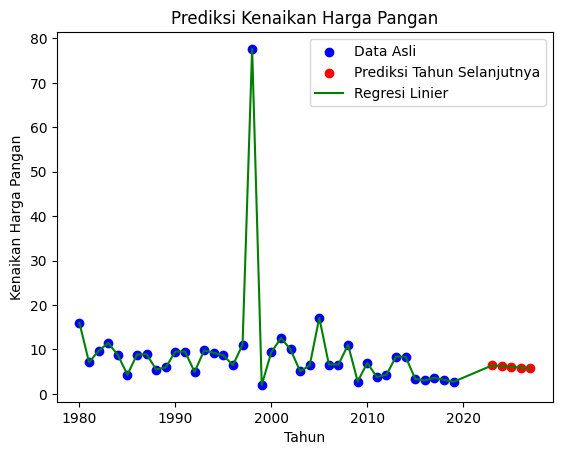

In [44]:
# Contoh prediksi kenaikan harga pangan untuk tahun selanjutnya
y = dataset.iloc[:, 1].values
tahun_selanjutnya = np.array([[2023], [2024], [2025], [2026], [2027]]) # Ganti dengan tahun yang ingin diprediksi
prediksi_tahun_selanjutnya = regressor.predict(tahun_selanjutnya)

print("Prediksi kenaikan harga pangan untuk tahun selanjutnya:")
for tahun, prediksi in zip(tahun_selanjutnya, prediksi_tahun_selanjutnya):
    print("Tahun:", tahun[0], "Prediksi:", prediksi)

# Menyiapkan data untuk visualisasi
tahun = np.concatenate((X, tahun_selanjutnya))

kenaikan_harga_pangan = np.concatenate((y, prediksi_tahun_selanjutnya))

# Plot data asli
plt.scatter(X, y, color='blue', label='Data Asli')

# Plot prediksi tahun selanjutnya
plt.scatter(tahun_selanjutnya, prediksi_tahun_selanjutnya, color='red', label='Prediksi Tahun Selanjutnya')

# Plot garis regresi linier
plt.plot(tahun, kenaikan_harga_pangan, color='green', label='Regresi Linier')

plt.xlabel('Tahun')
plt.ylabel('Kenaikan Harga Pangan')
plt.title('Prediksi Kenaikan Harga Pangan')
plt.legend()
plt.show()